## Breast Cancer Analysis Using Logistic Regression , KNN and Decision Tree.

## Data Importing & Preprocessing 

In [4]:
import pandas as pd
import os
os.chdir("D:/Praveen Naidu/Data Science/Kaggle/Breast Cancer predicton")
df=pd.read_csv("data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [7]:
import warnings
warnings.simplefilter('ignore')

In [8]:
df.sample()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
73,859983,M,13.8,15.79,90.43,584.1,0.1007,0.128,0.07789,0.05069,...,20.86,110.3,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.103,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

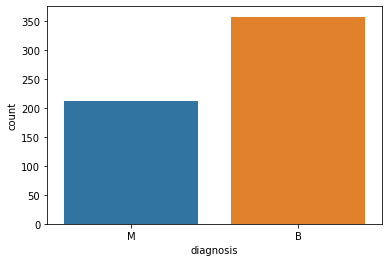

In [10]:
ax=sns.countplot(df['diagnosis'])

In [11]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(len(num_feature))

30


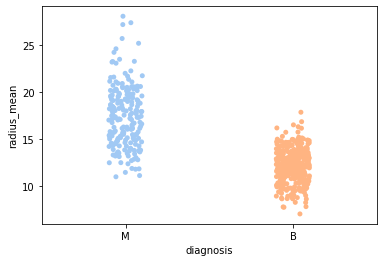

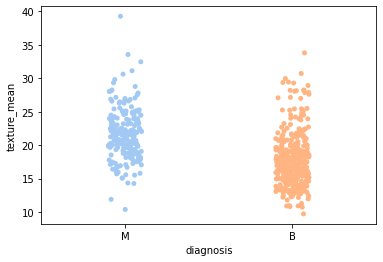

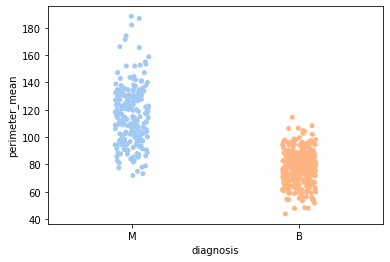

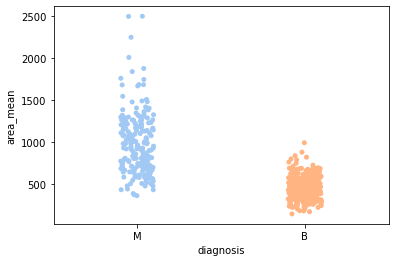

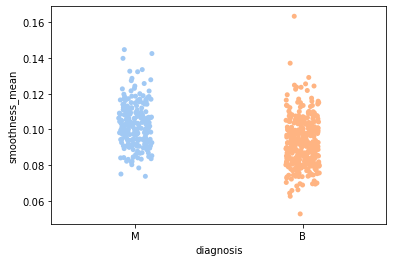

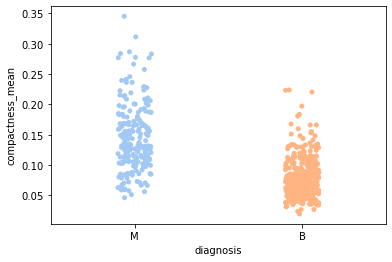

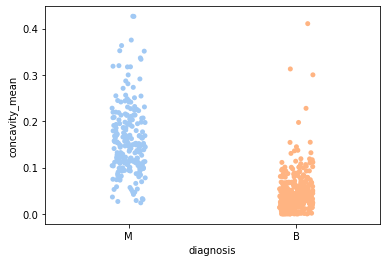

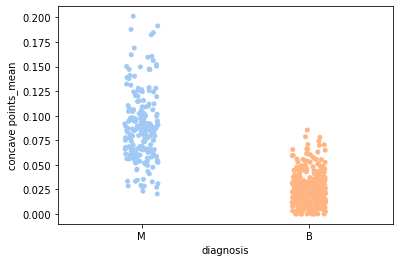

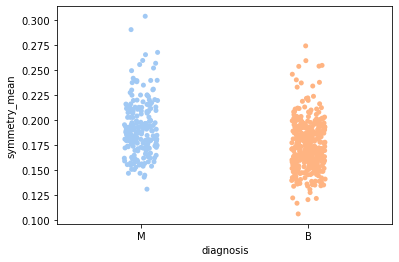

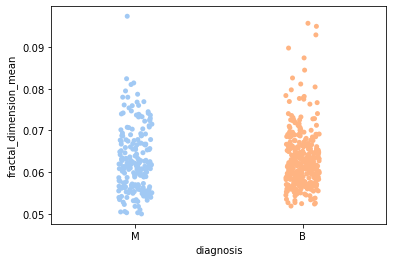

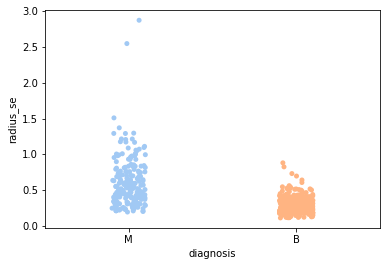

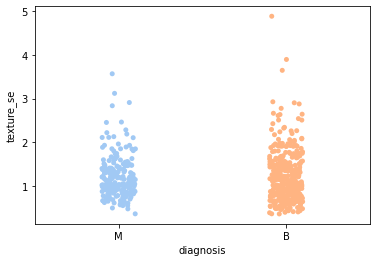

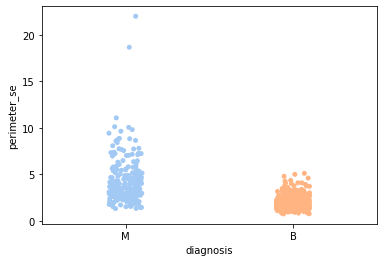

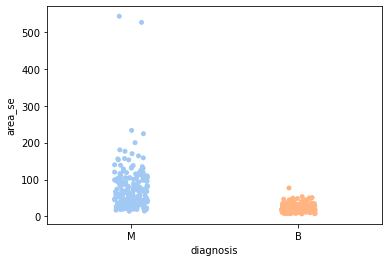

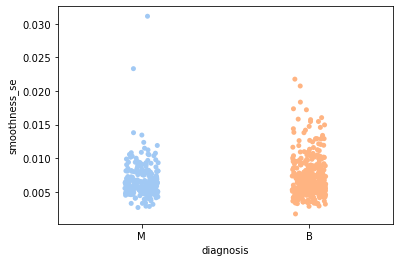

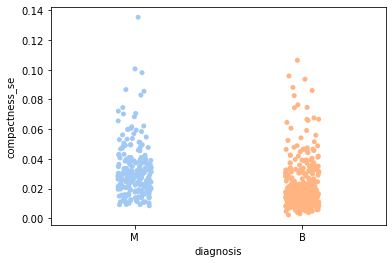

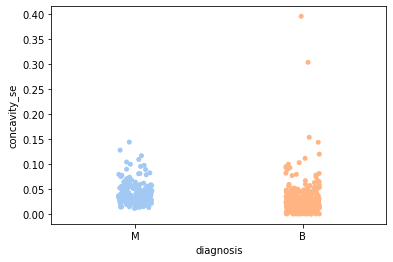

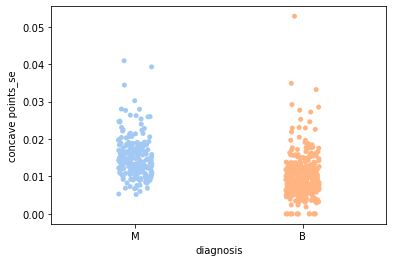

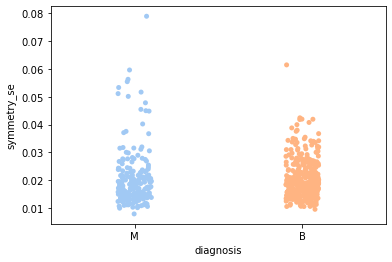

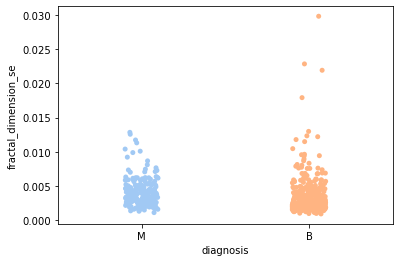

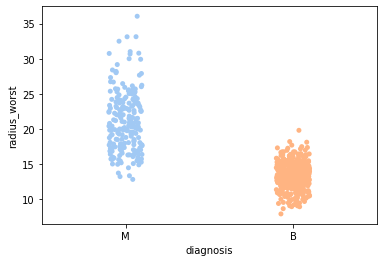

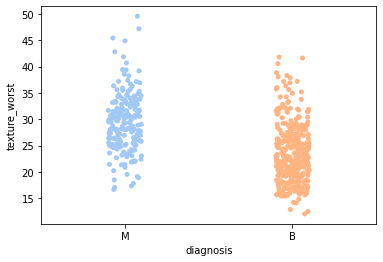

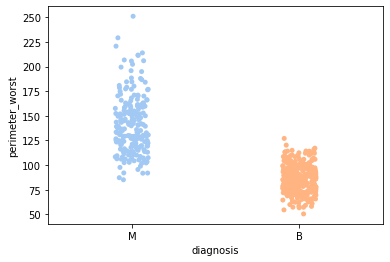

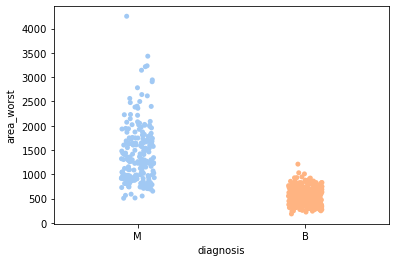

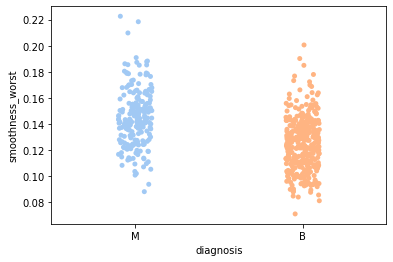

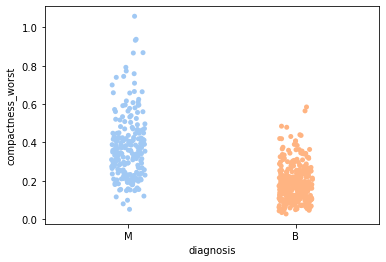

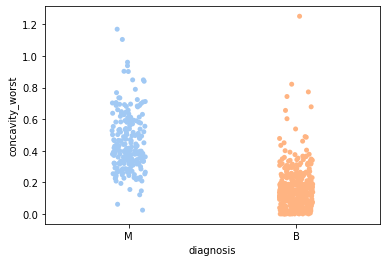

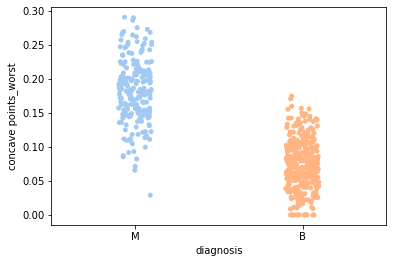

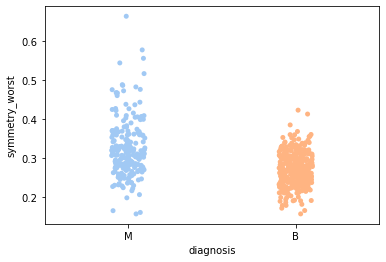

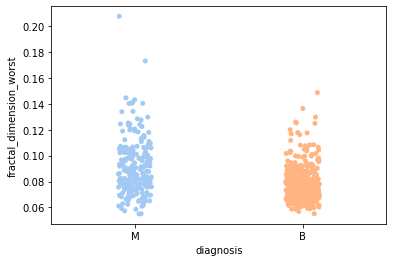

<Figure size 432x288 with 0 Axes>

In [13]:
for feature in num_feature:
    sns.stripplot(x=df['diagnosis'],y=df[feature],palette='pastel')
    plt.show()
    plt.clf()

Text(0.5, 1.0, 'Clustermap for Clustering')

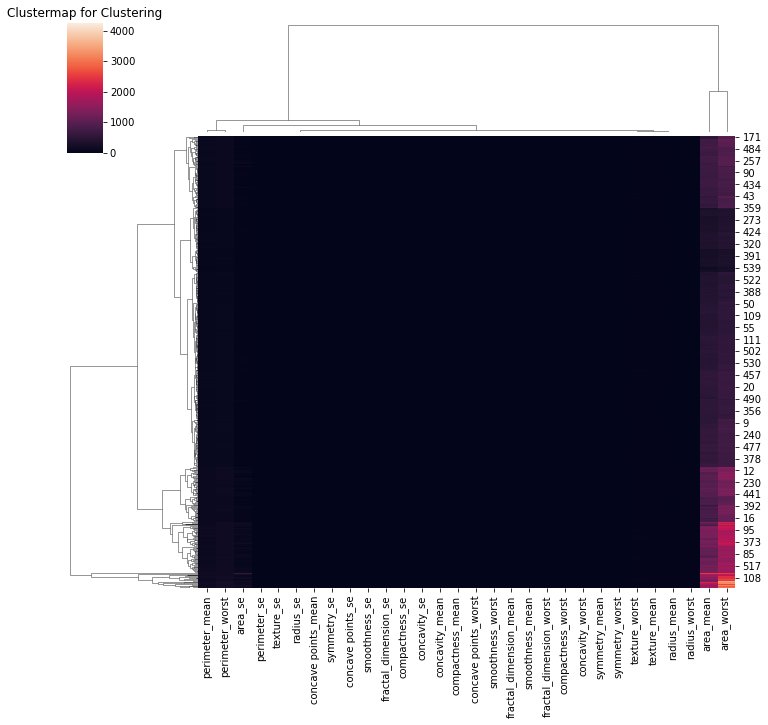

In [14]:
sns.clustermap(df[num_feature])
plt.title("Clustermap for Clustering")

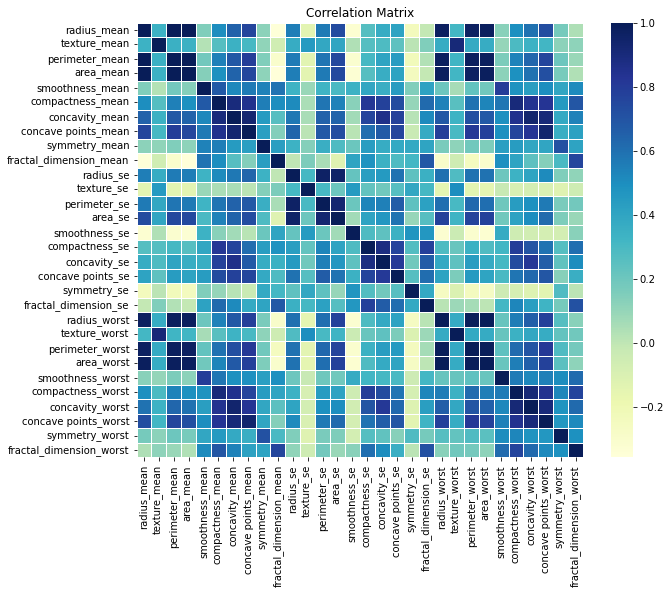

In [15]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
cormat = sns.heatmap(corr,cmap='YlGnBu', linewidths=1)
cormat.set_title('Correlation Matrix')
plt.show()

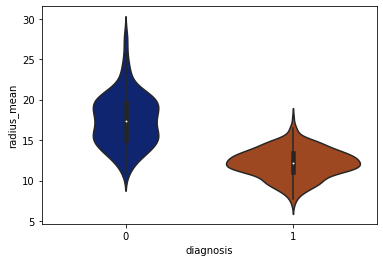

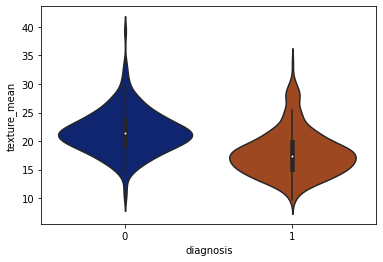

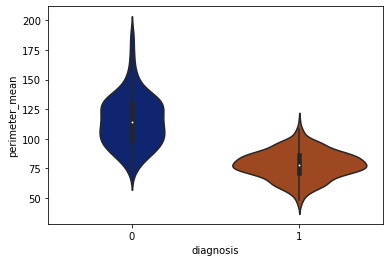

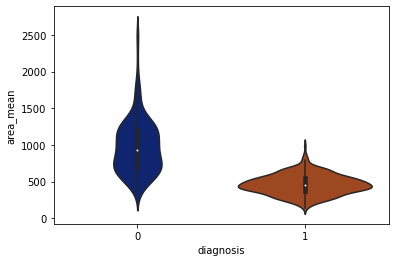

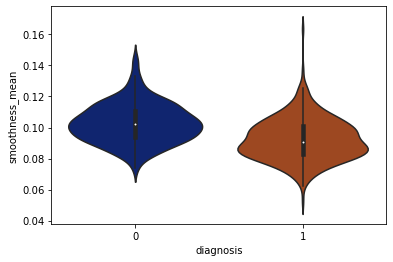

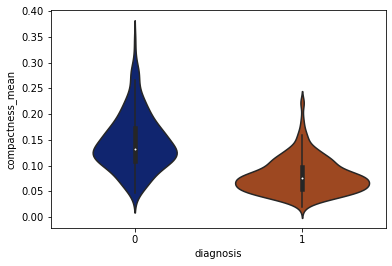

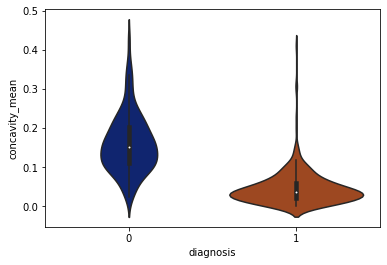

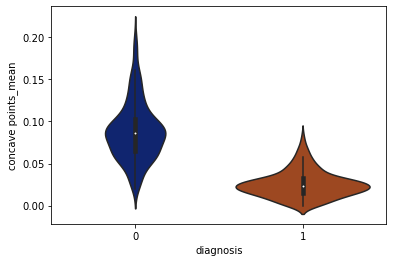

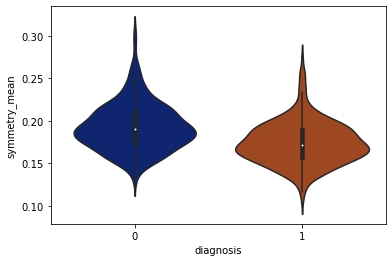

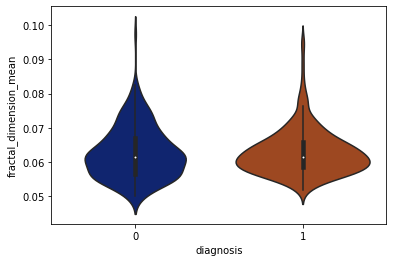

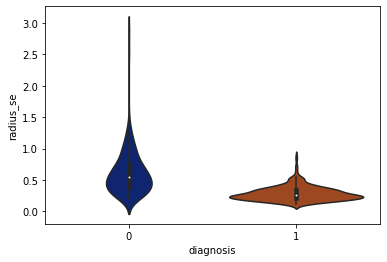

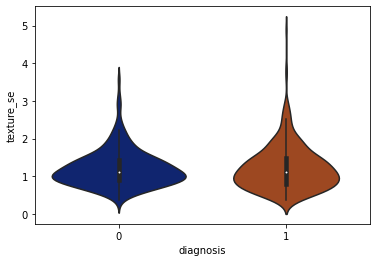

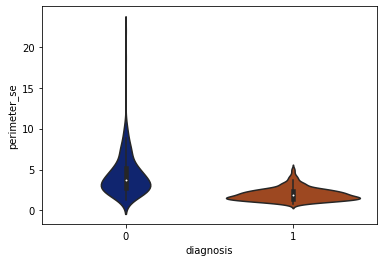

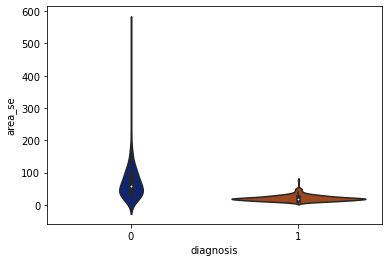

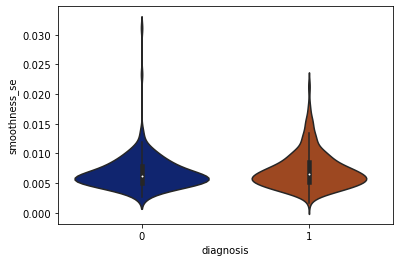

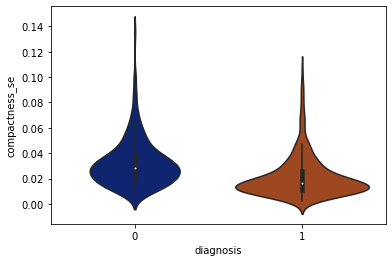

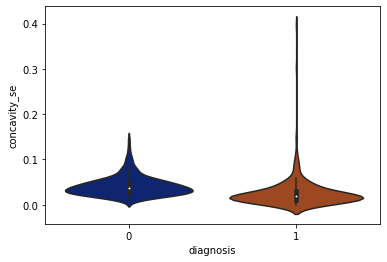

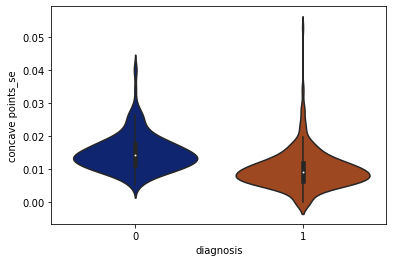

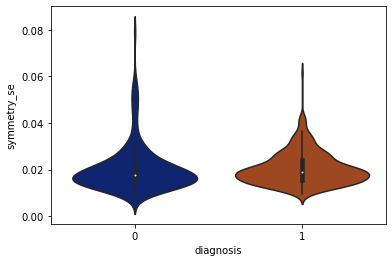

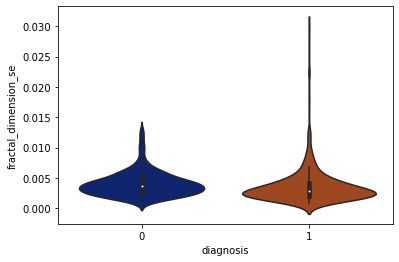

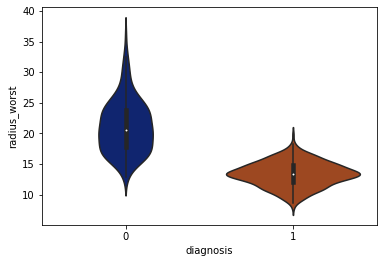

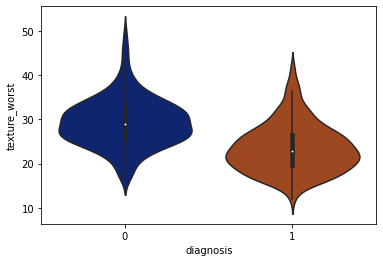

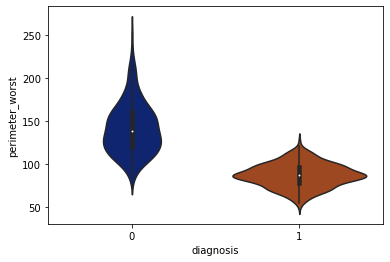

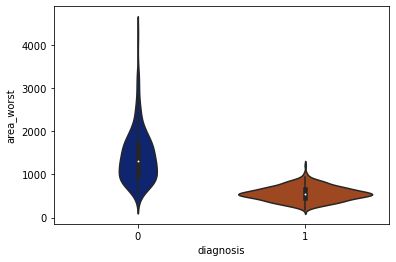

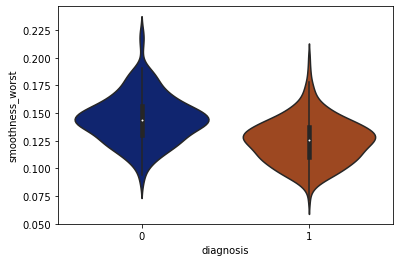

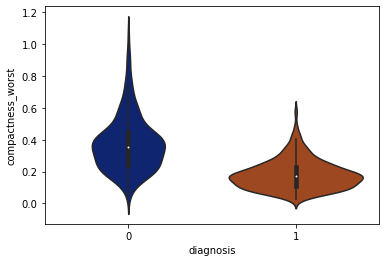

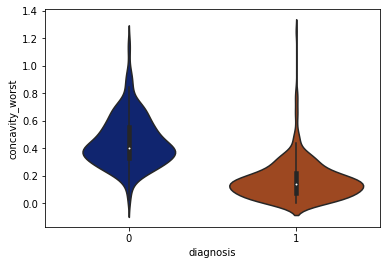

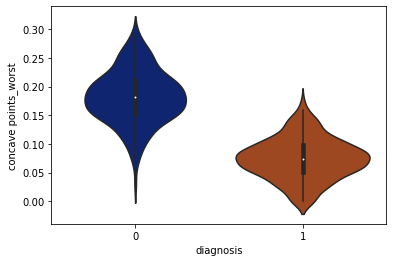

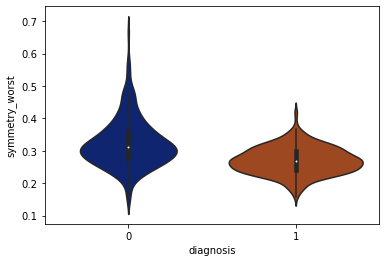

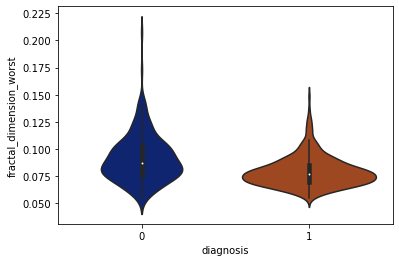

In [23]:
for feature in num_feature:
    sns.violinplot(x=df['diagnosis'],y=df[feature],palette='dark',df=df[num_feature])
    plt.show()

In [17]:
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

In [19]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='pink')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='pink')
    plt.title('Q-Q Plot')
    
    plt.show()

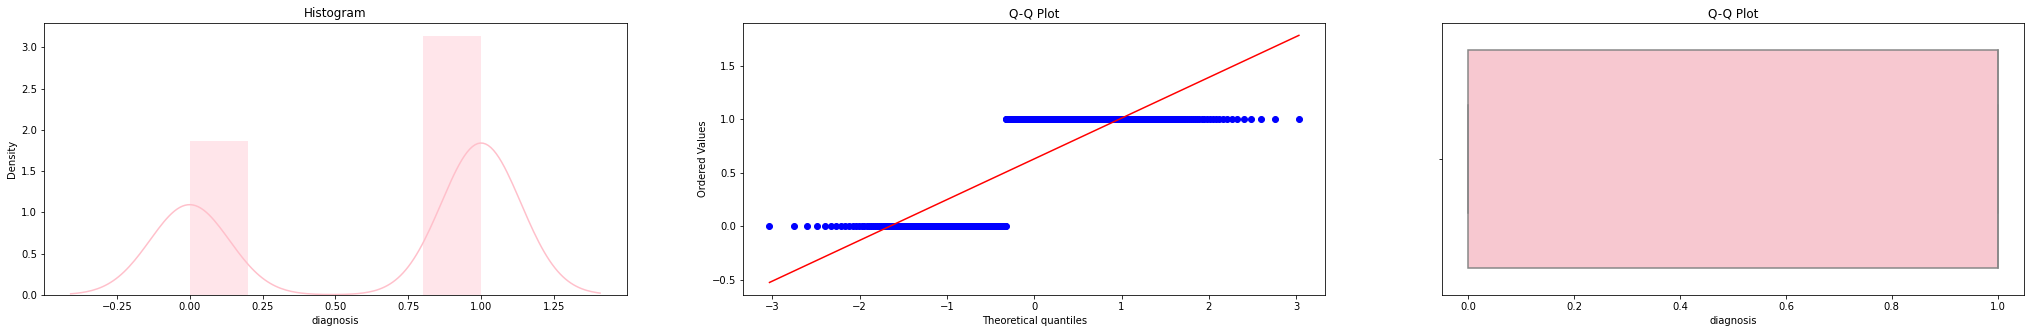

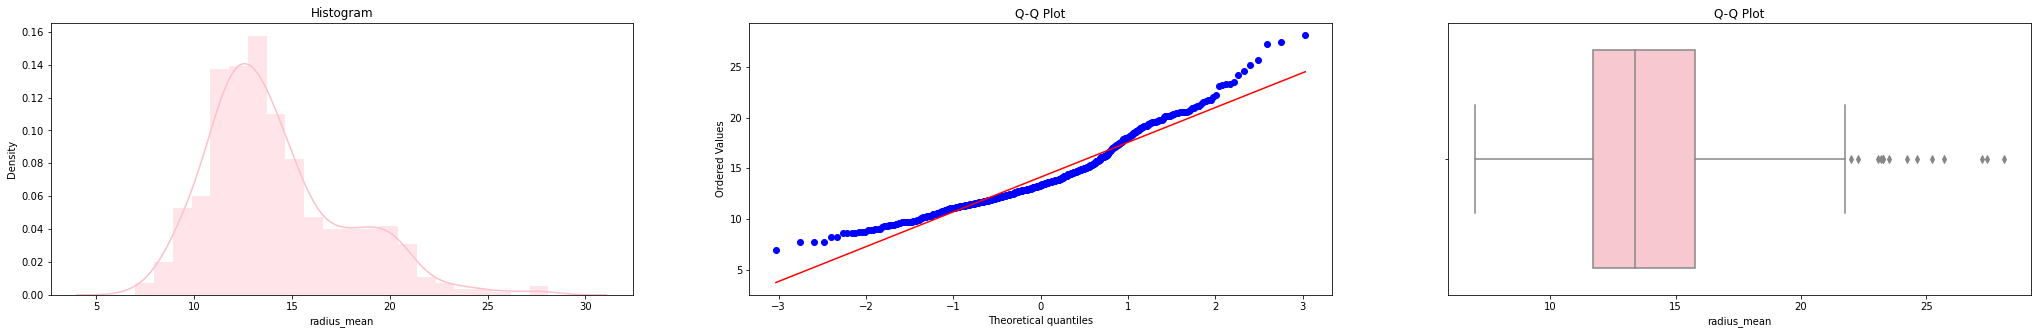

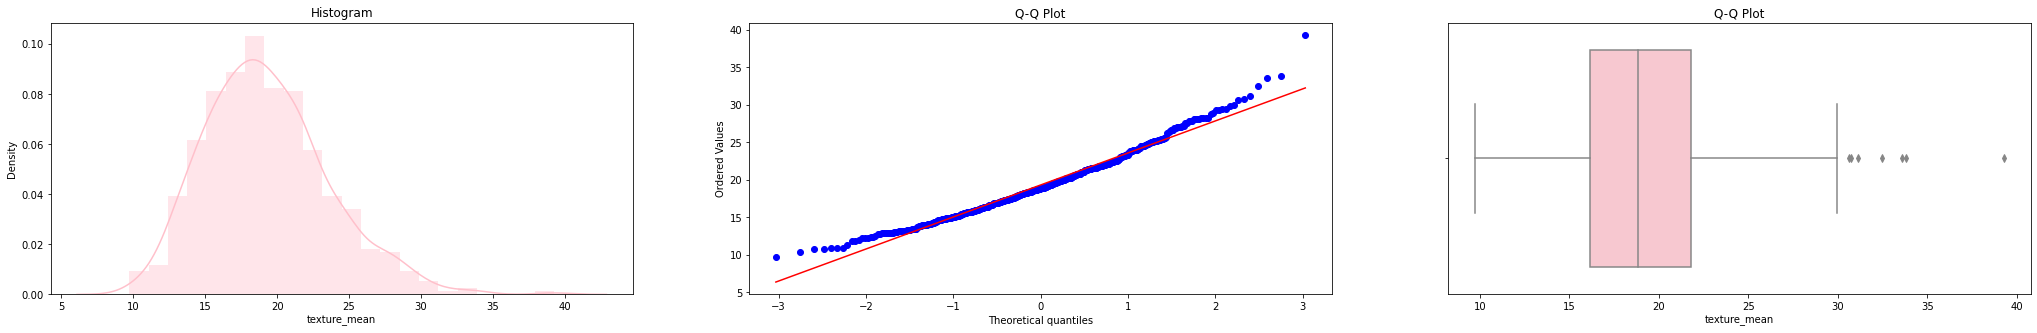

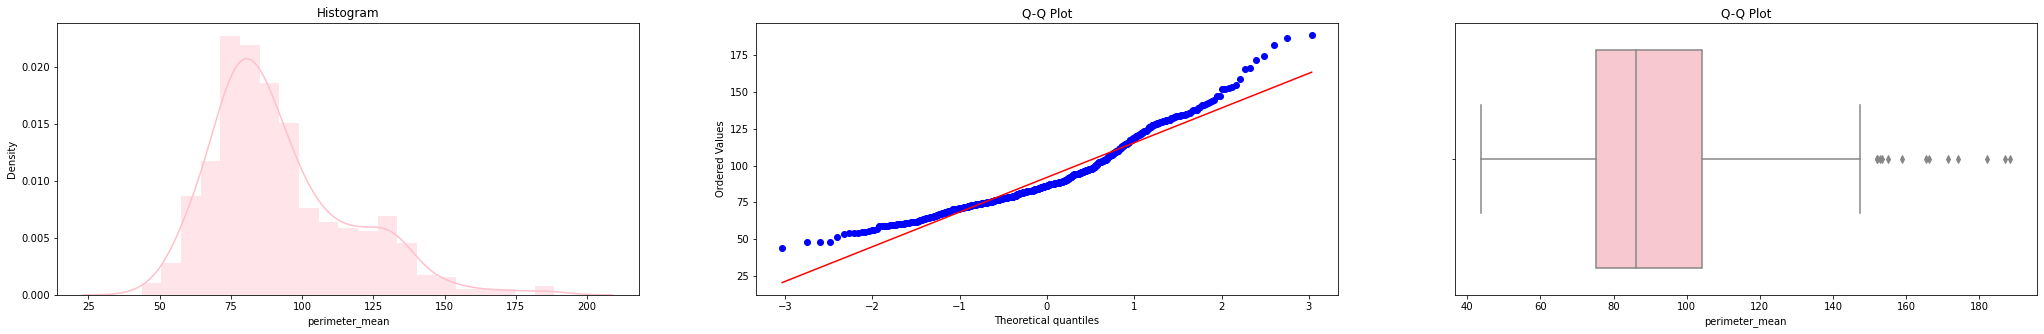

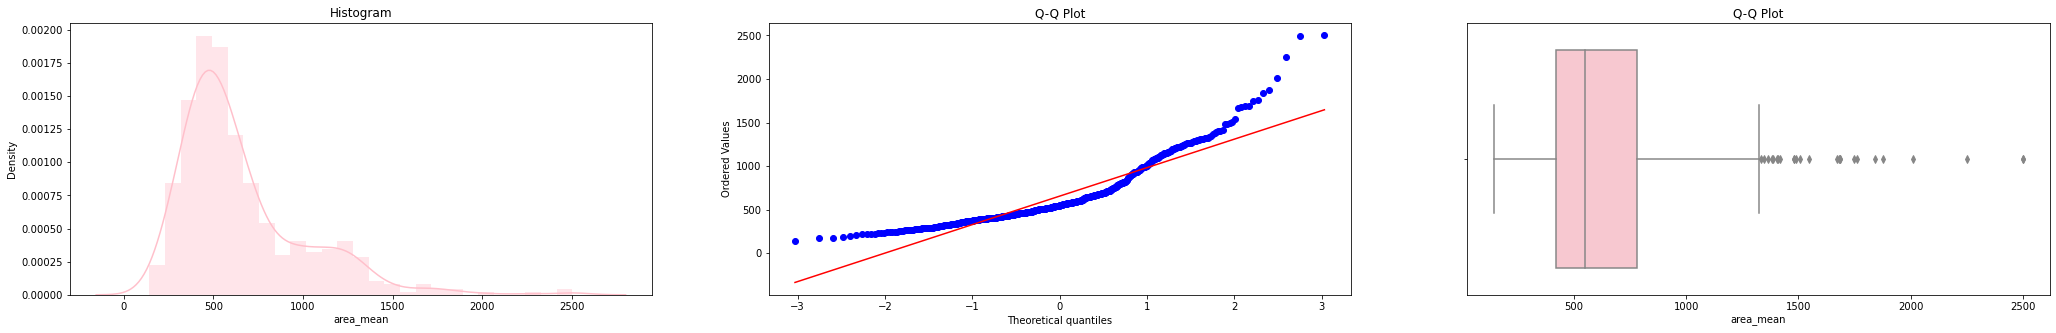

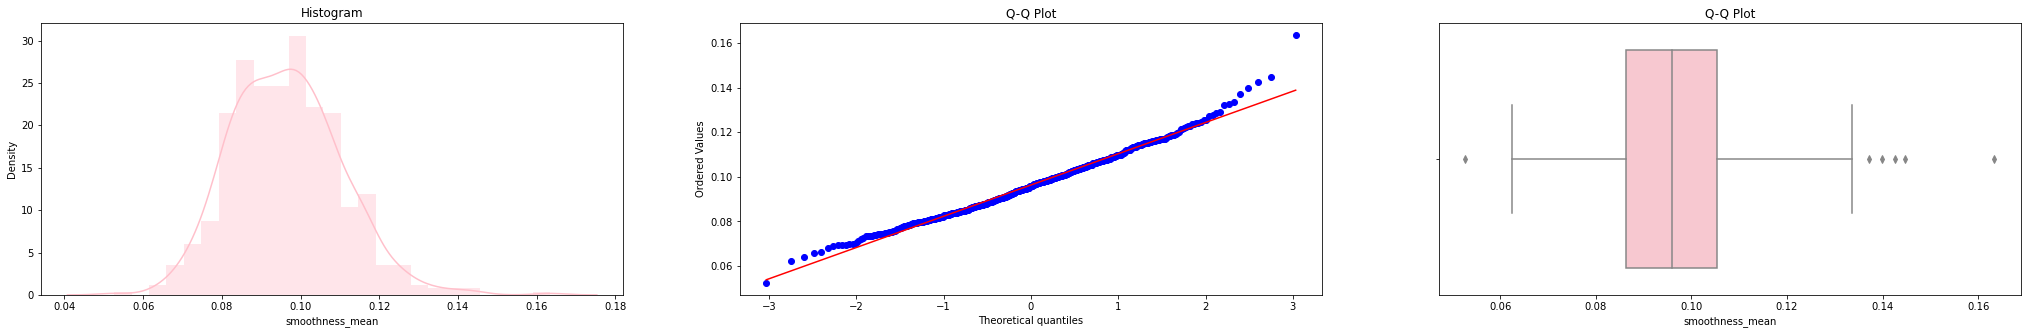

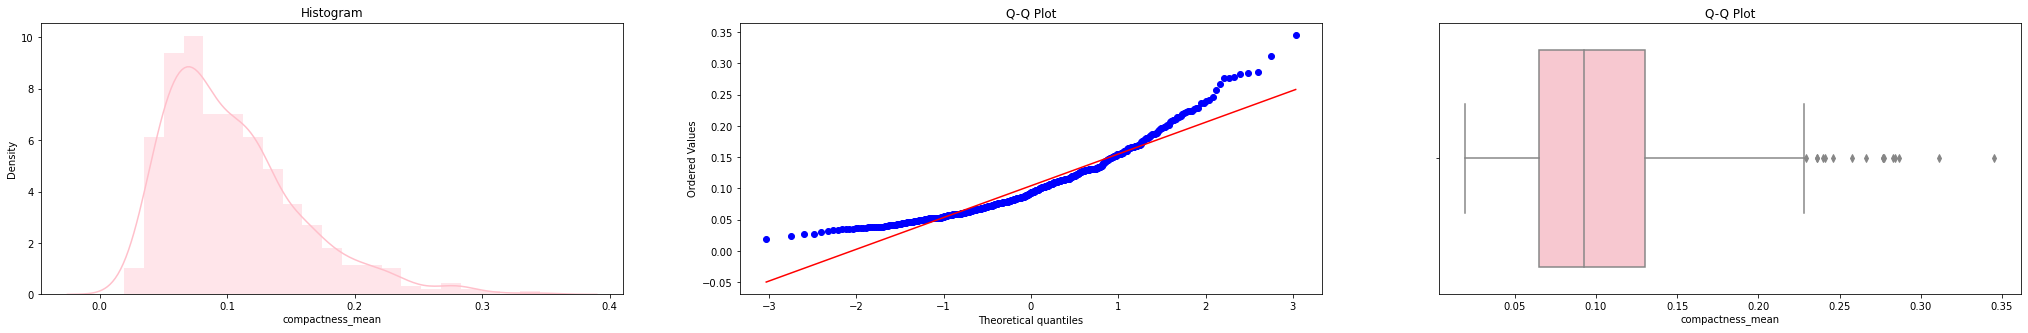

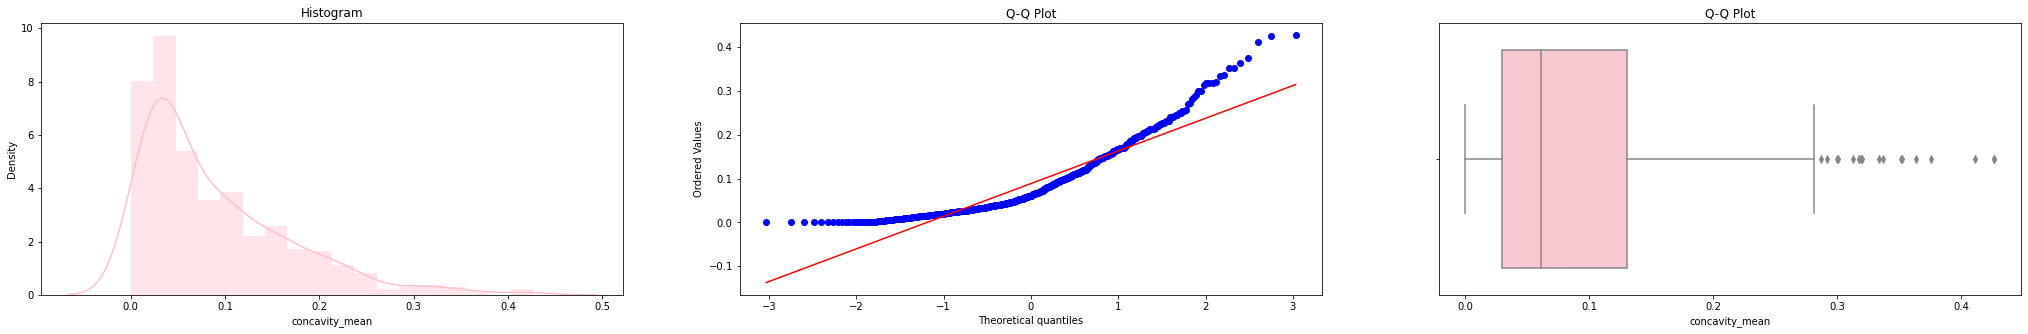

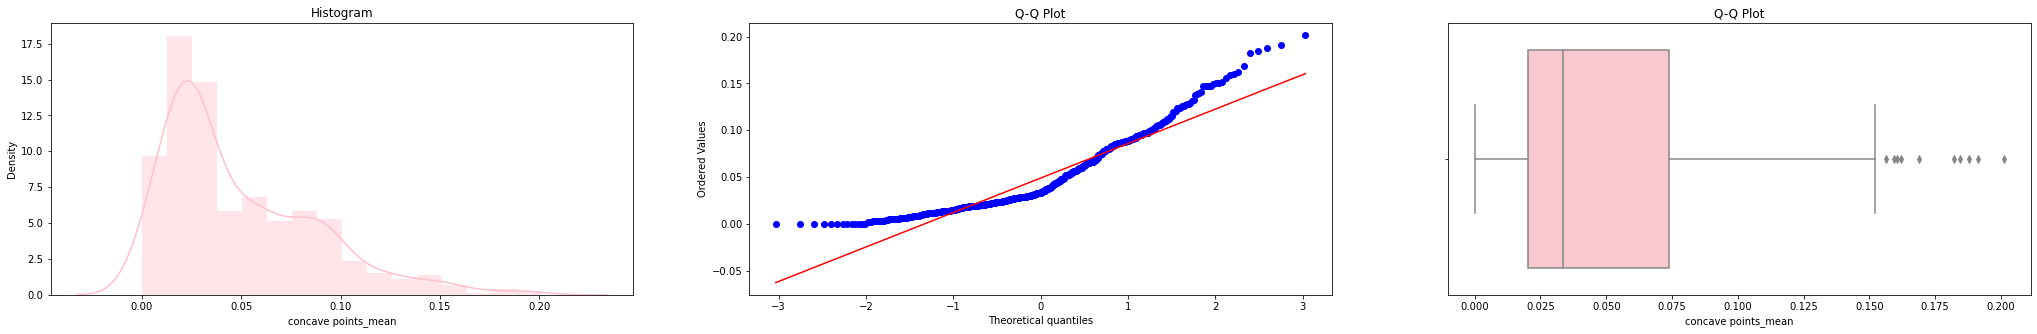

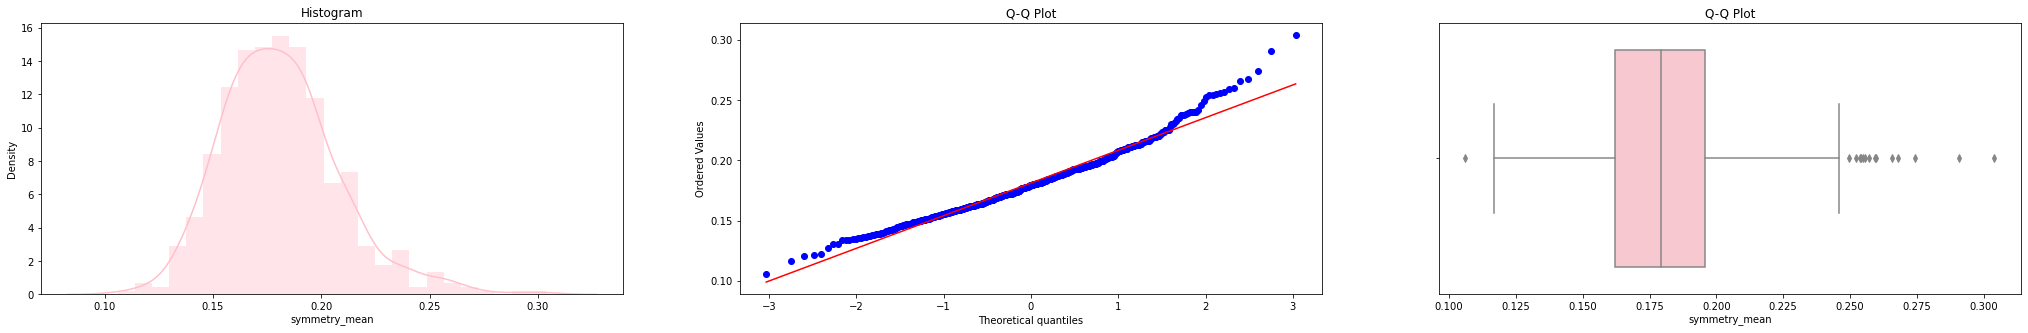

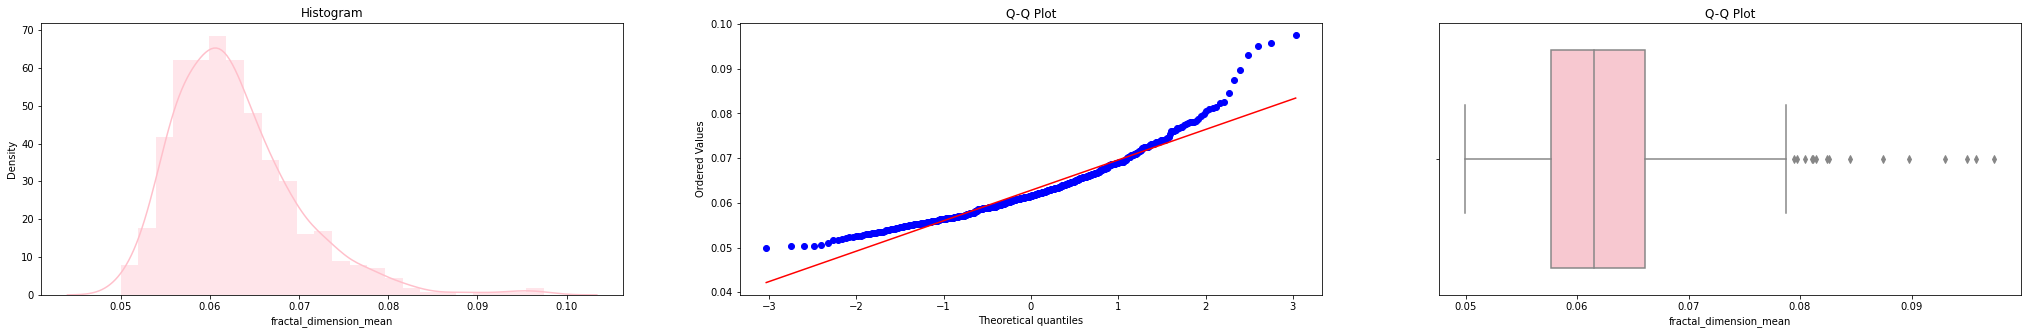

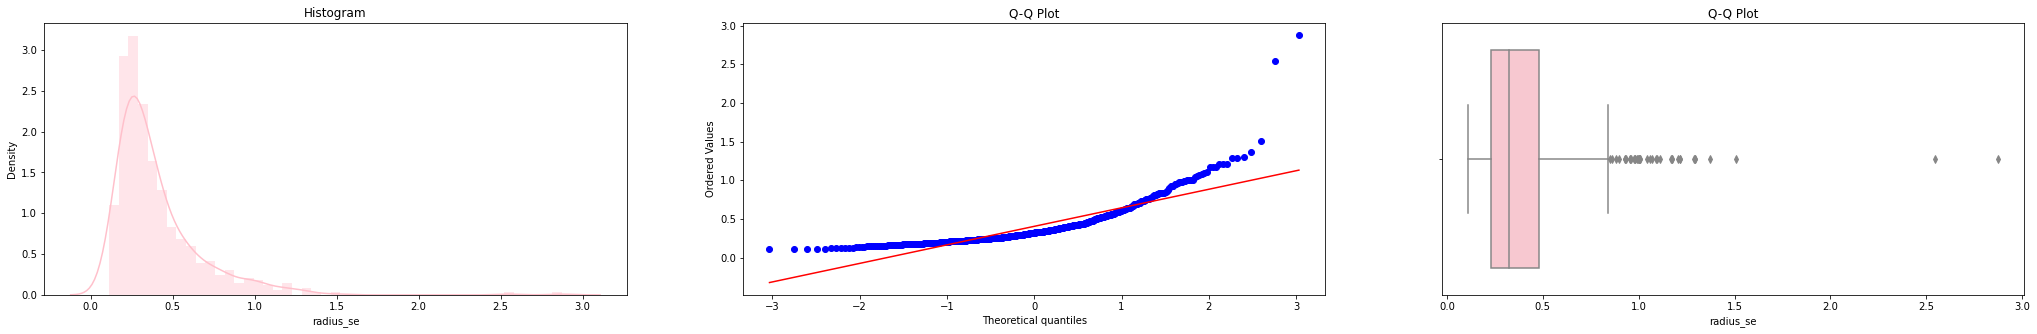

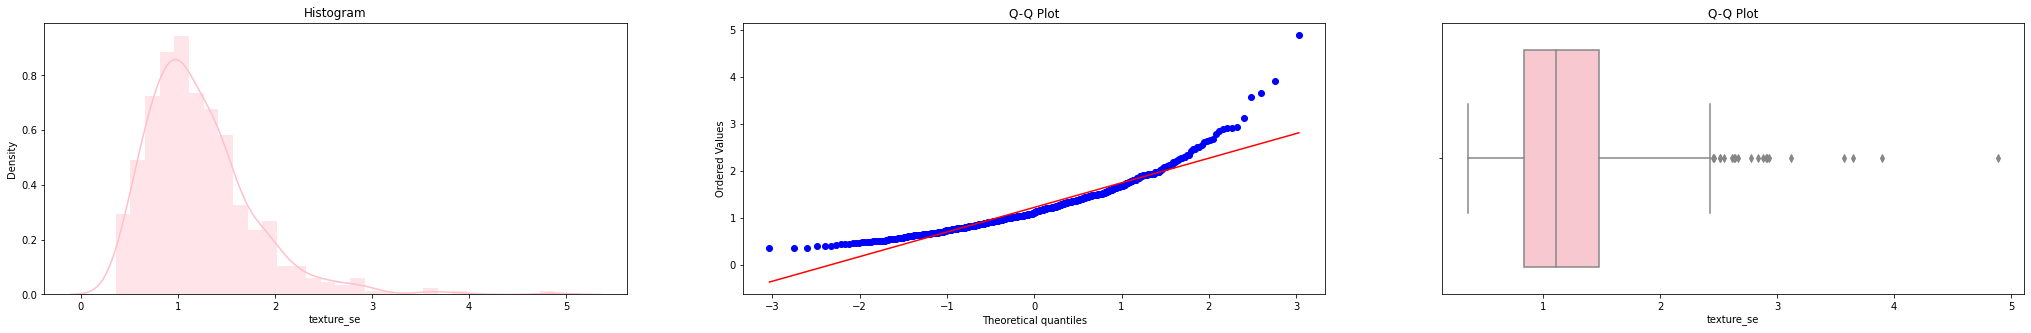

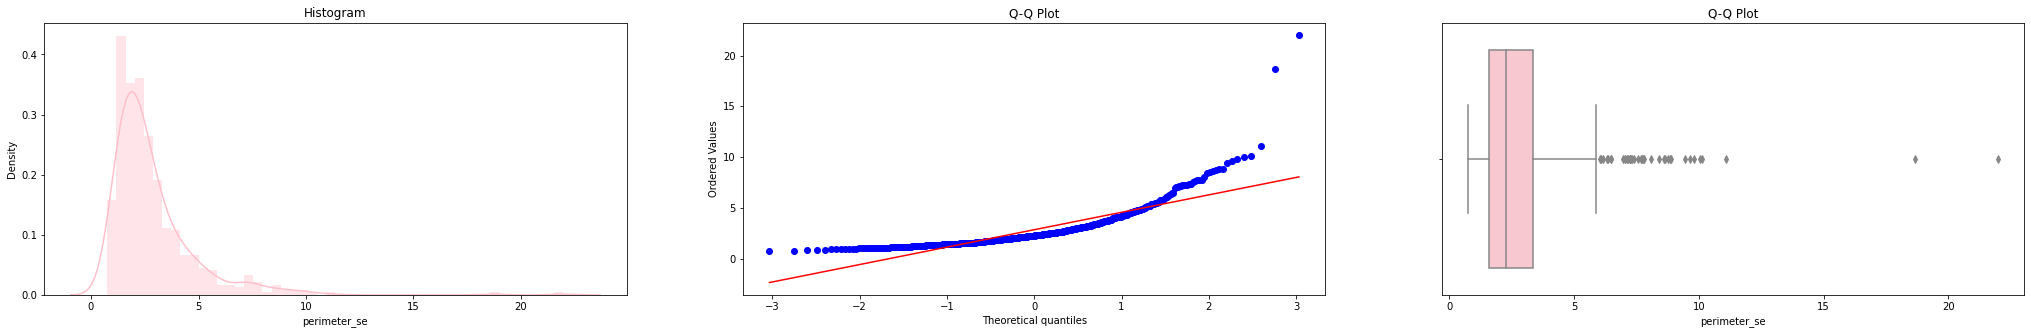

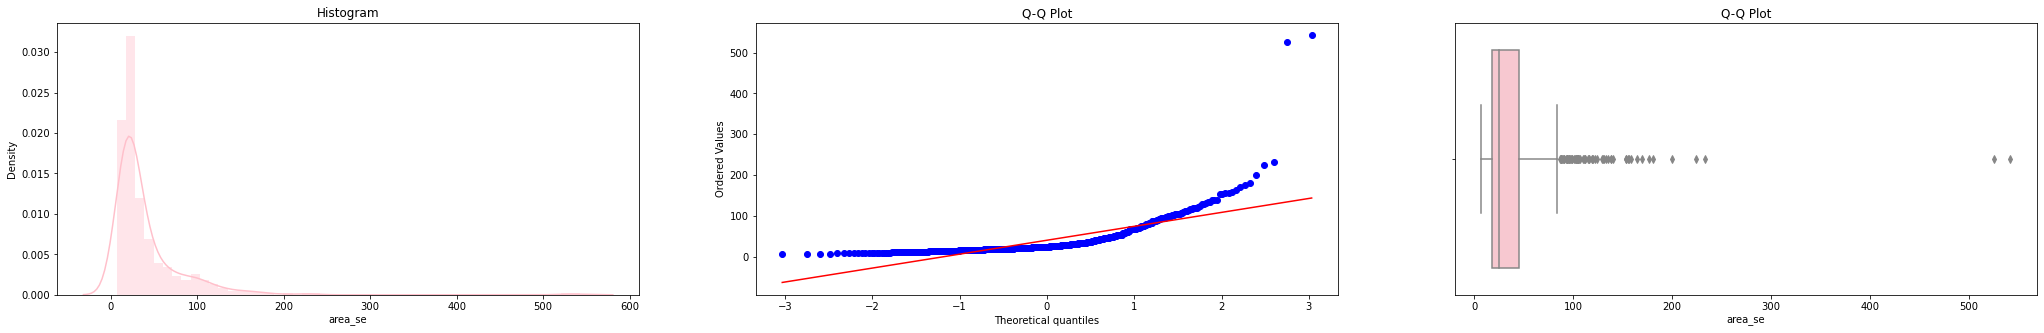

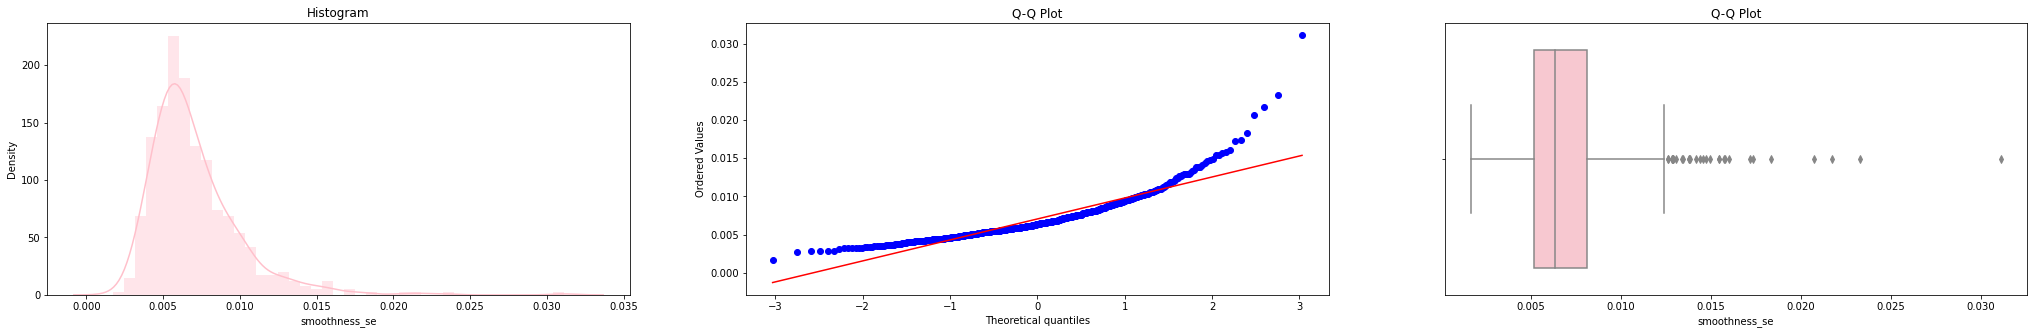

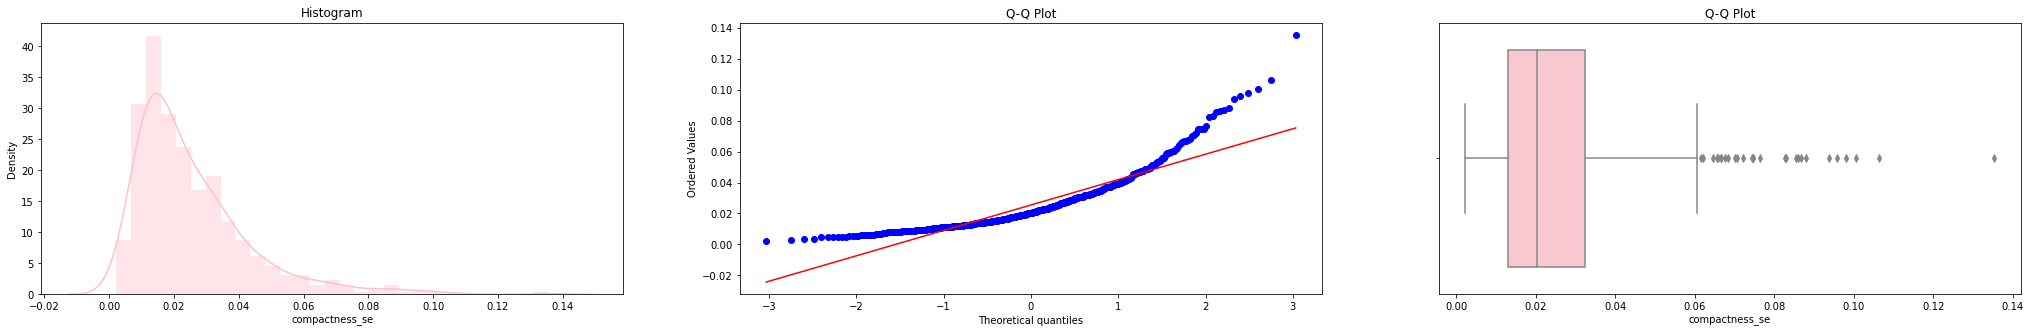

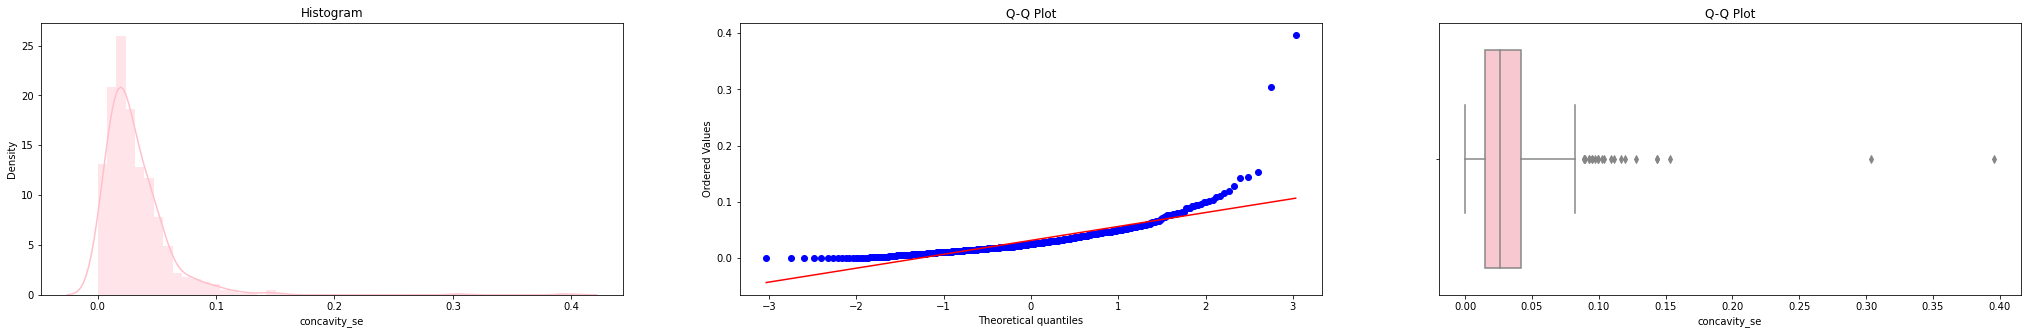

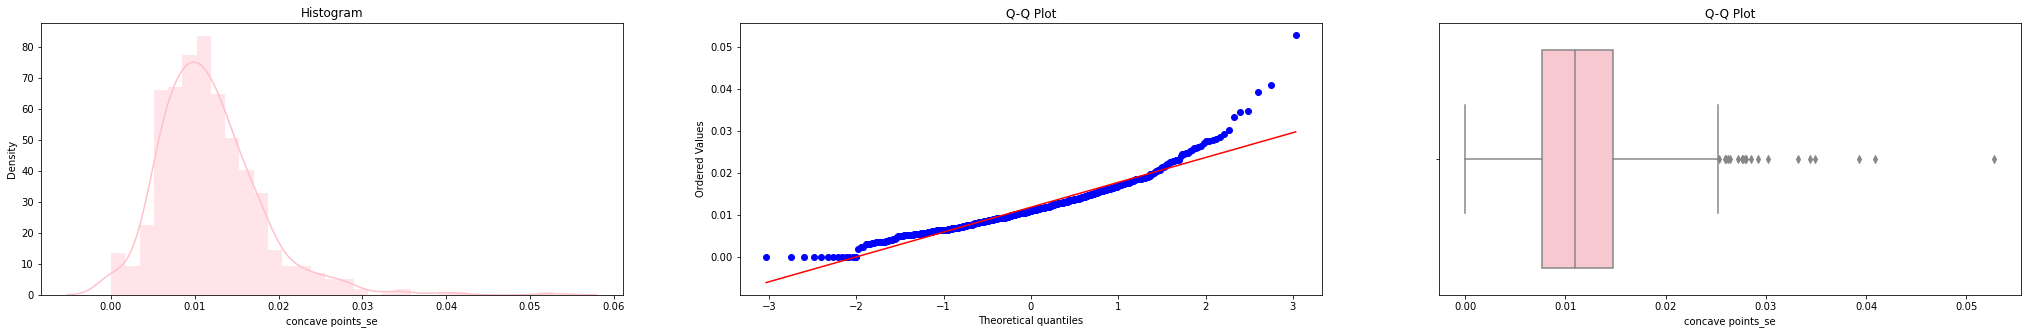

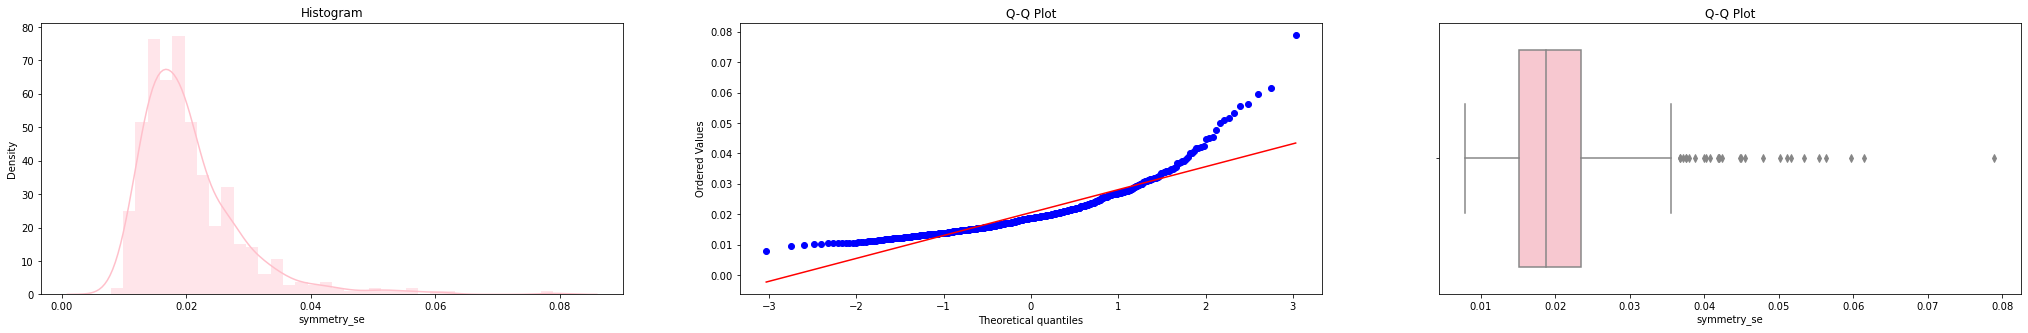

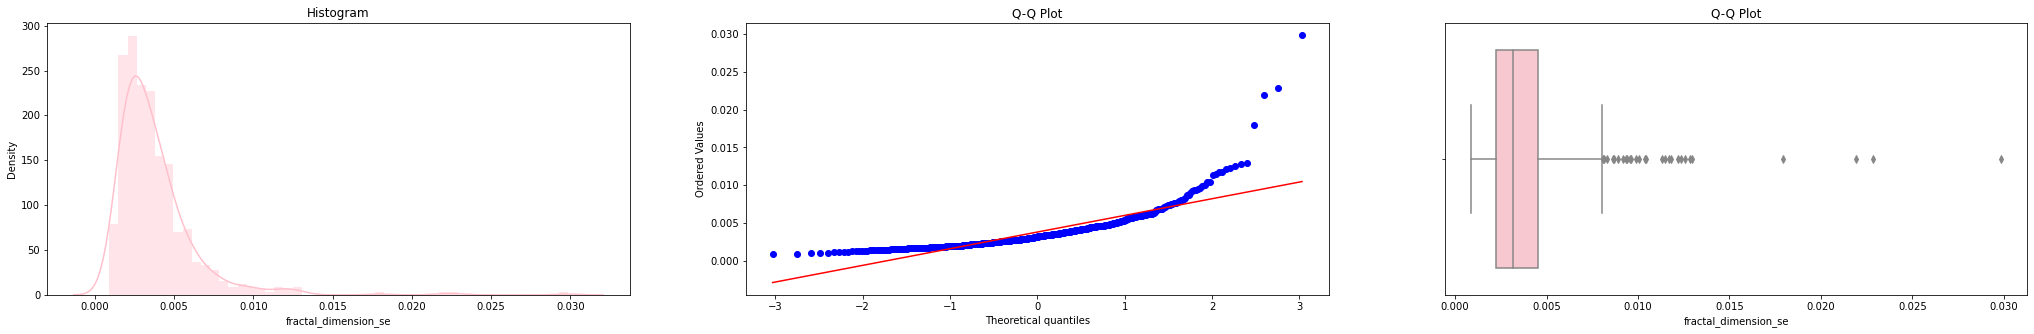

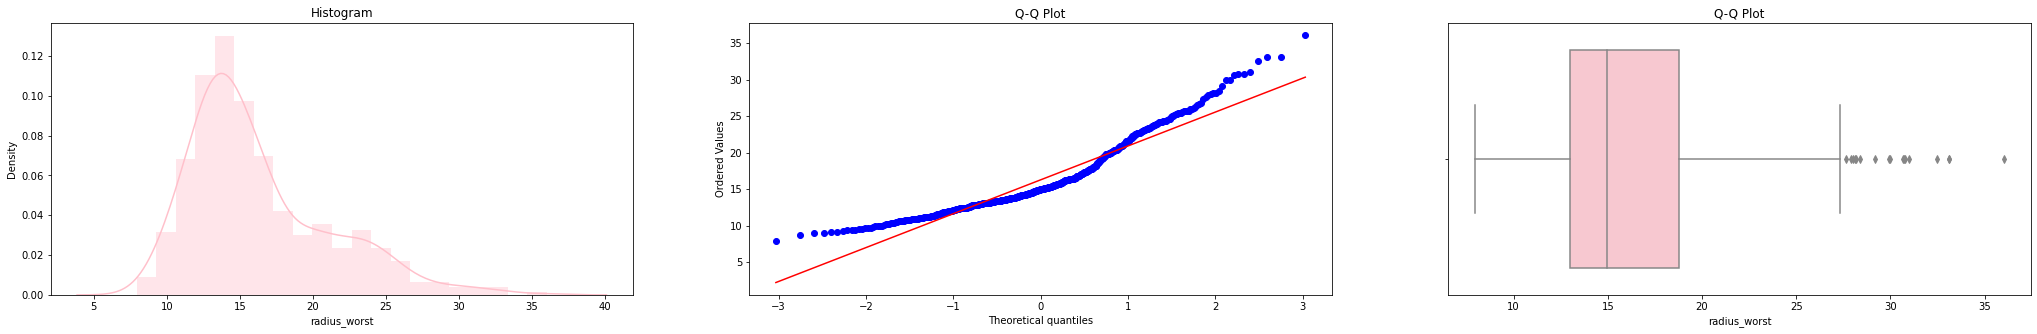

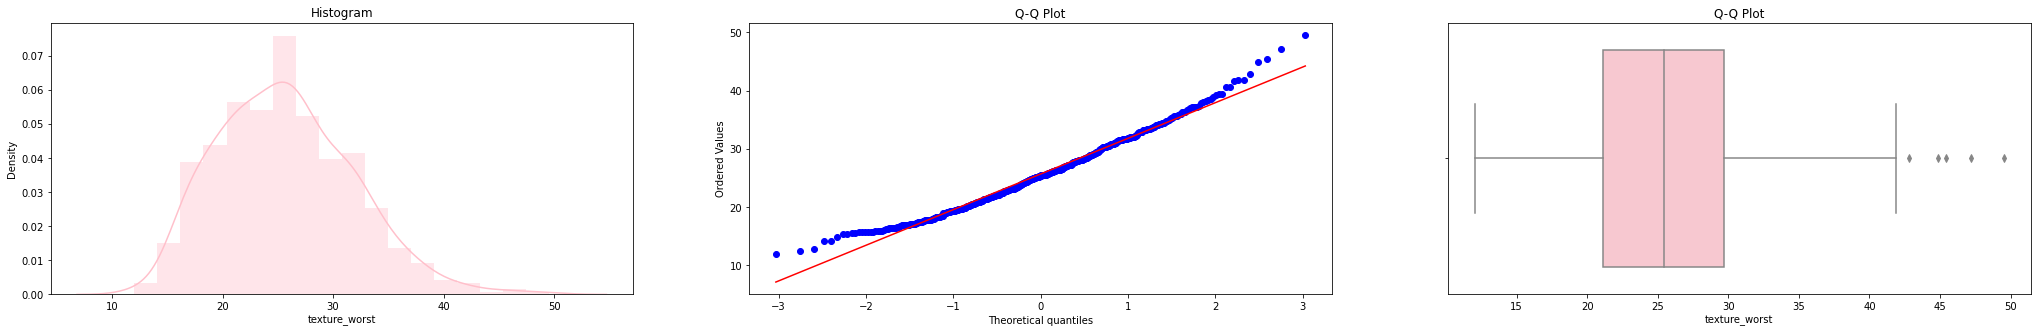

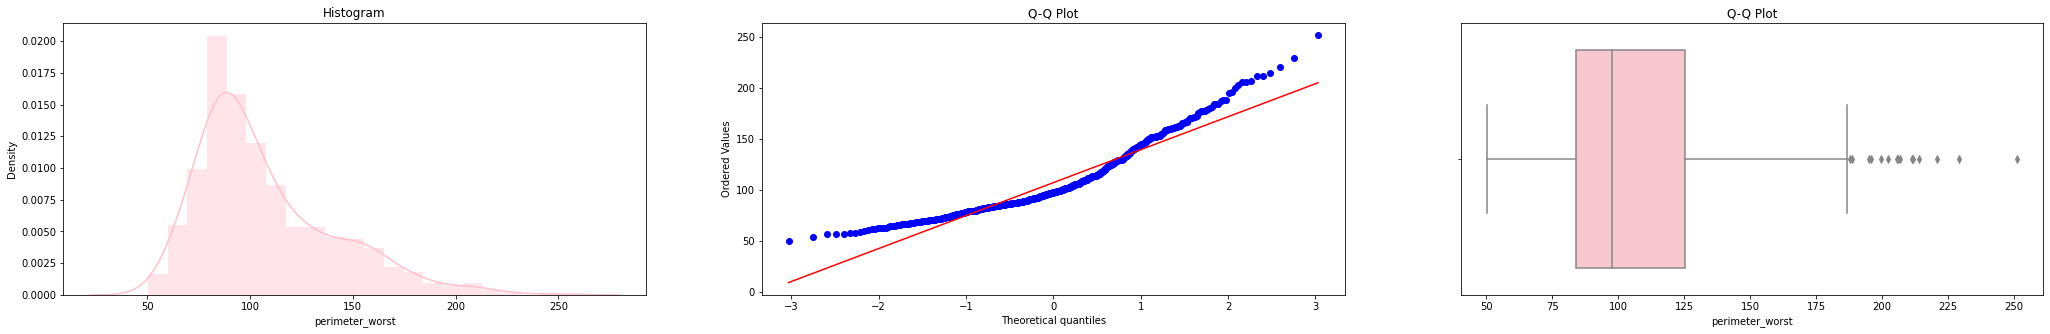

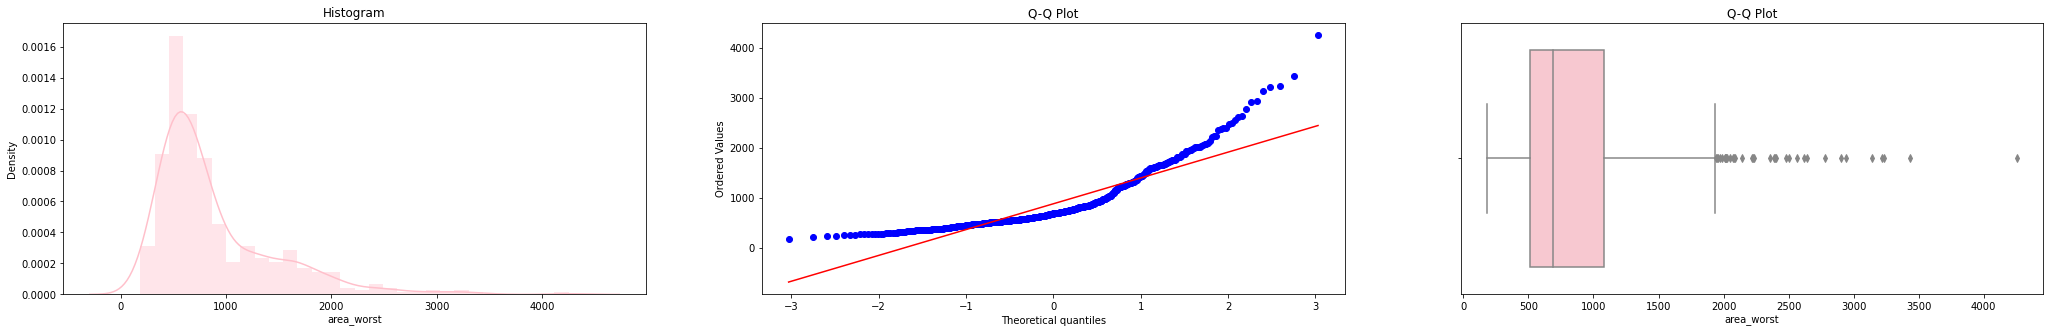

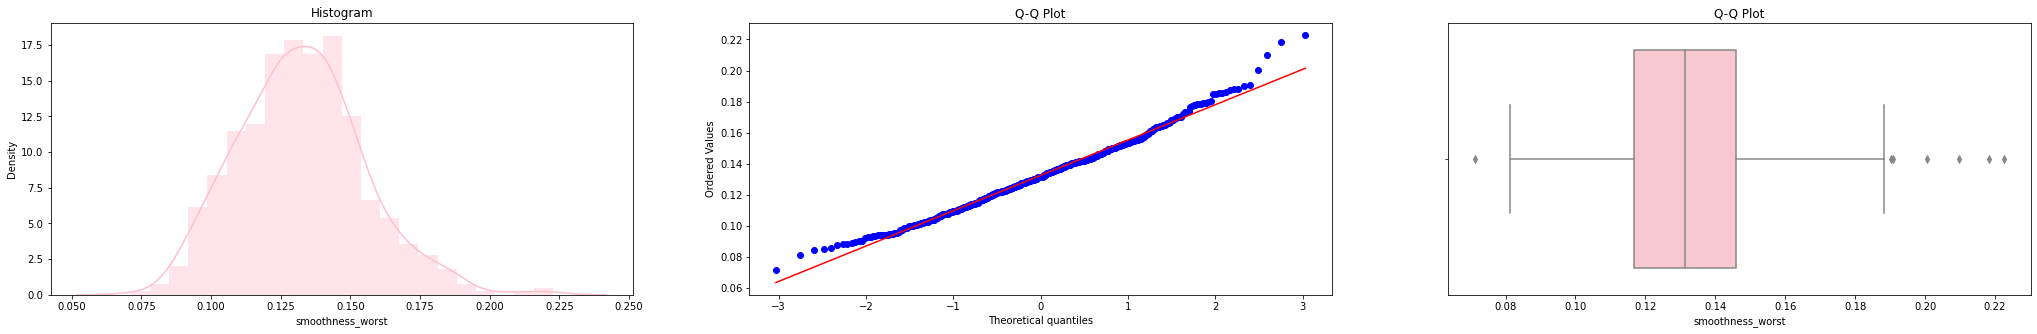

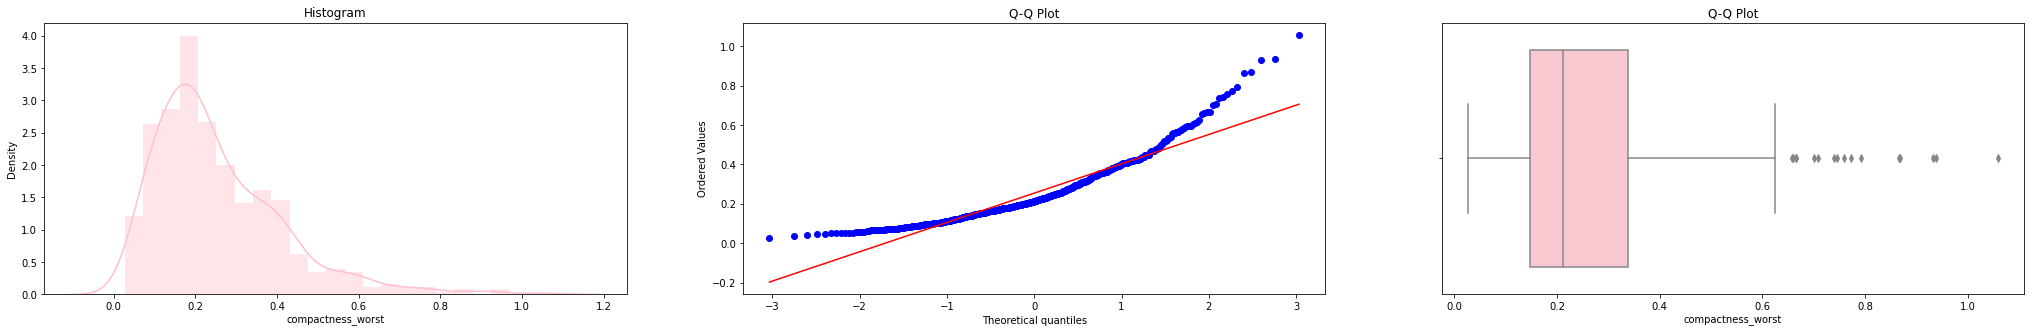

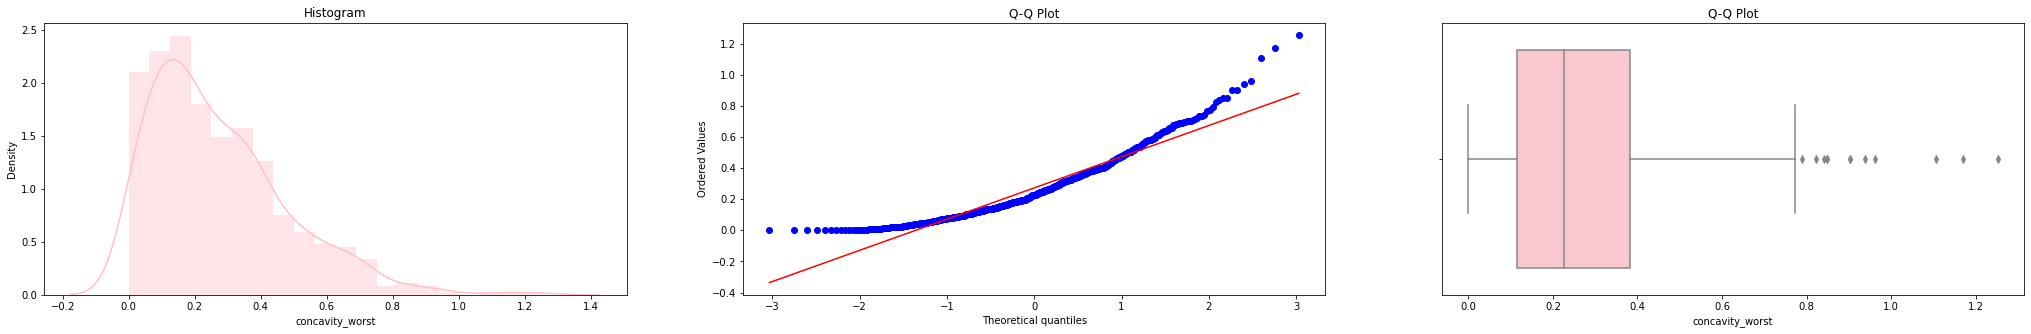

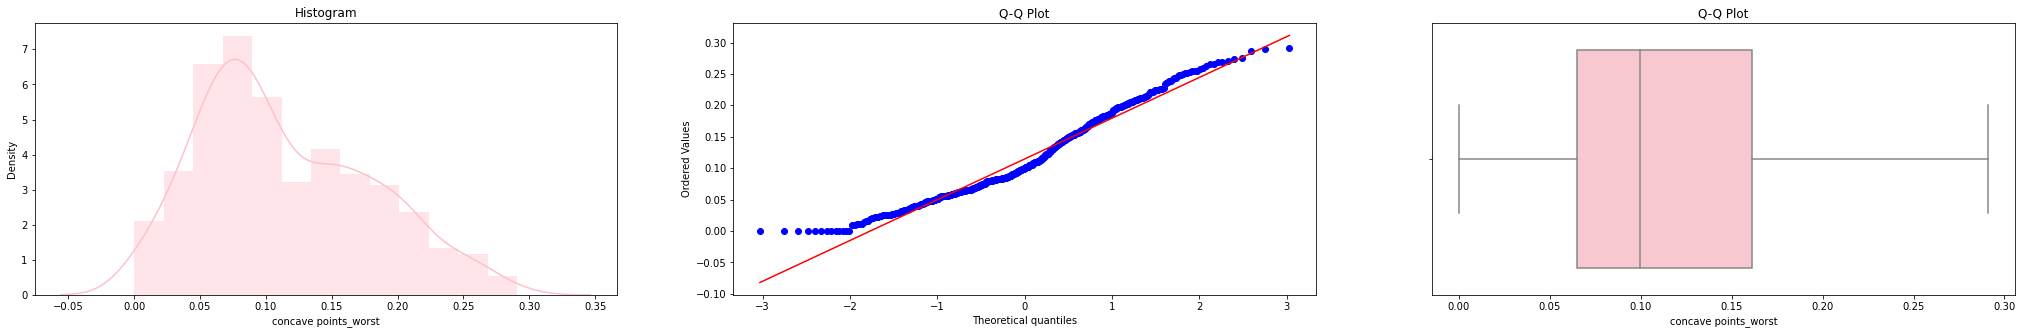

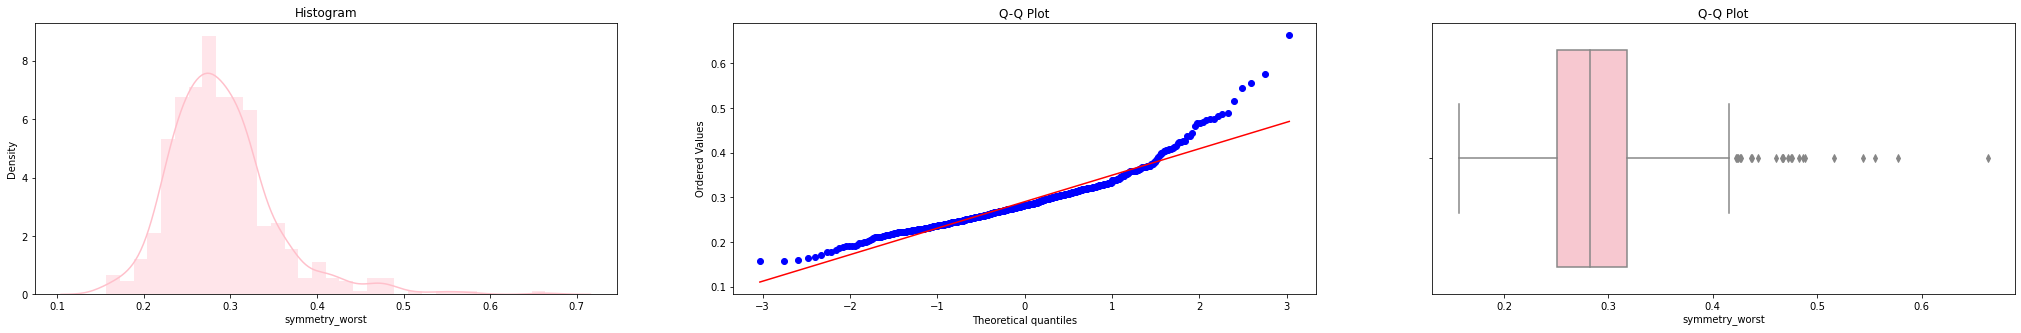

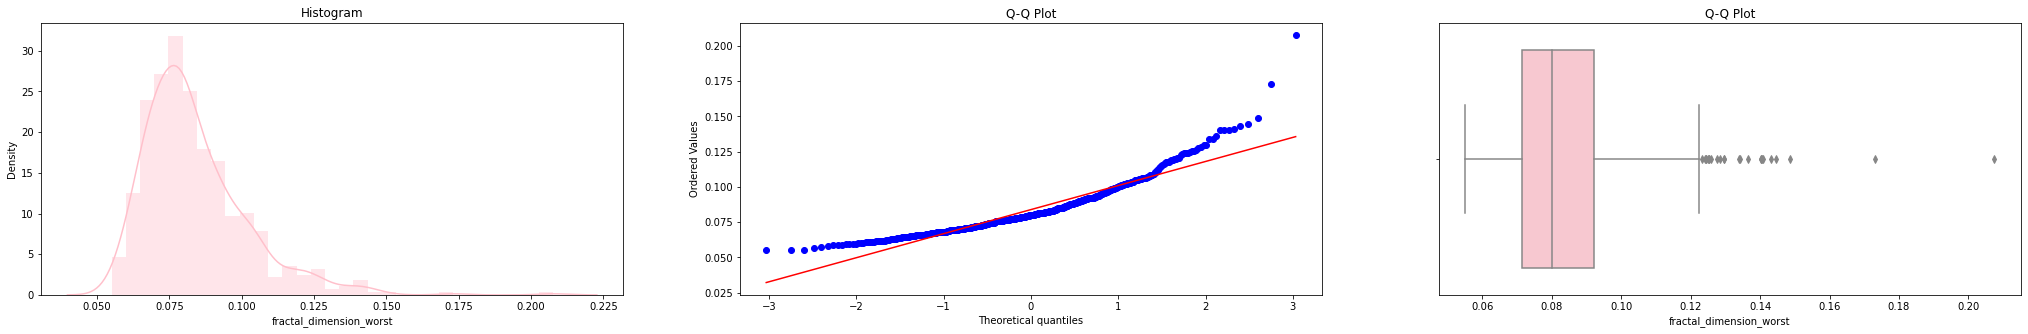

In [24]:
for col in df.columns:
    diagnostic_plot(df, col)

## Logistic Regression Model 

In [25]:
x=df.drop(['diagnosis'],axis=1)

In [26]:
y=df['diagnosis']

In [27]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
x_train.shape

(455, 30)

In [30]:
x_test.shape

(114, 30)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_predicted=model.predict(x_test)

In [34]:
y_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1], dtype=int64)

In [35]:
model.predict_proba(x_test)

array([[9.98113140e-01, 1.88686047e-03],
       [3.24607504e-02, 9.67539250e-01],
       [8.04741806e-04, 9.99195258e-01],
       [9.79406043e-03, 9.90205940e-01],
       [1.76635652e-04, 9.99823364e-01],
       [3.31062364e-03, 9.96689376e-01],
       [1.35234996e-04, 9.99864765e-01],
       [1.10826024e-03, 9.98891740e-01],
       [4.15873787e-05, 9.99958413e-01],
       [2.09735267e-06, 9.99997903e-01],
       [1.93501861e-01, 8.06498139e-01],
       [7.41333318e-02, 9.25866668e-01],
       [9.60382933e-06, 9.99990396e-01],
       [5.55569956e-01, 4.44430044e-01],
       [4.11643421e-01, 5.88356579e-01],
       [9.95194696e-01, 4.80530360e-03],
       [2.04645550e-03, 9.97953545e-01],
       [9.99997859e-01, 2.14098115e-06],
       [9.99910476e-01, 8.95242778e-05],
       [9.99999997e-01, 2.56616169e-09],
       [9.98613960e-01, 1.38604022e-03],
       [9.84570293e-01, 1.54297066e-02],
       [1.36201762e-02, 9.86379824e-01],
       [8.83602634e-04, 9.99116397e-01],
       [9.994755

In [36]:
model.score(x_test,y_predicted)

1.0

In [37]:
ConfusionMatrix = confusion_matrix(y_test, y_predicted)
print(ConfusionMatrix)

[[45  2]
 [ 2 65]]


In [38]:
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.9649122807017544


In [39]:
LRAcc=(TN+TP)/Total

In [40]:
LRAcc

0.9649122807017544

The Accuracy Using Logistic Regression Model is 0.9649122807017544

## KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.9649122807017544 at K = 3


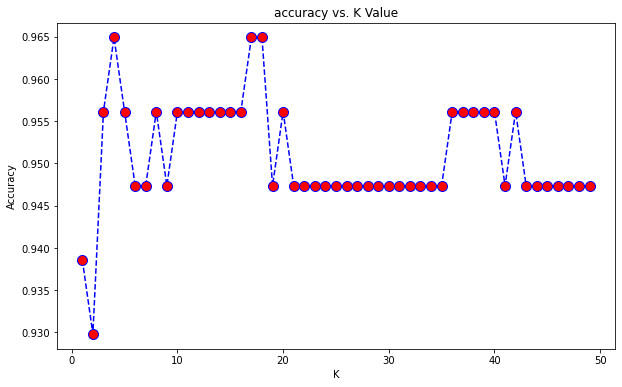

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [44]:
KNNacc=max(acc)

In [45]:
KNNacc

0.9649122807017544

The Accuracy Using KNN Model is 0.9649122807017544

neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()

In [47]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
dtcv=GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)
dtcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [50]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [51]:
dtcv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [52]:
dty_pred=dtcv.predict(x_test)

In [53]:
dtscore=accuracy_score(dty_pred,y_test)

In [54]:
print(dtscore)

0.9385964912280702


The Accuracy Using Descision Tree Model is 0.9385964912280702

## Plotting the Accuracy of 3 Models 

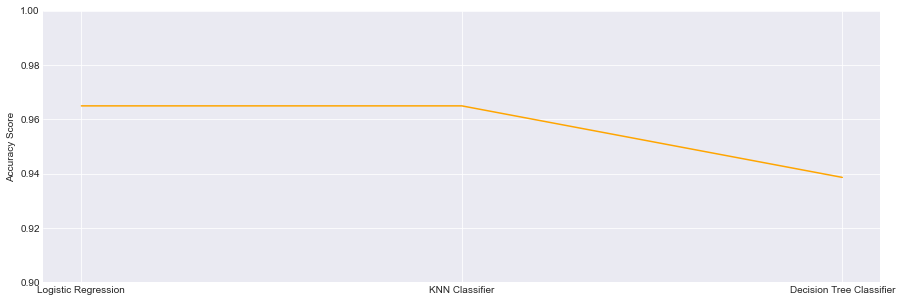

In [55]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 5))
models = ['Logistic Regression', 'KNN Classifier','Decision Tree Classifier']
test_accuracy = [LRAcc, KNNacc,dtscore]
plt.plot(models, test_accuracy, color='orange')
plt.ylim(0.90, 1.0)
plt.ylabel("Accuracy Score")
plt.show()